<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/10.%20DBSCAN_04_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Import the libraries
from sklearn.cluster import DBSCAN # to build DB Scan model
from sklearn.cluster import KMeans # to build k-means model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import sklearn # to calculate silhouette score
from sklearn.neighbors import NearestNeighbors # to calculate the eps value
import matplotlib.pyplot as plt

In [2]:
# Upload dataset - Universities_Clustering.csv
# reading a csv file using pandas library
df = pd.read_csv("iris (1).csv");

print(df.head())
df

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Check for null values and understand the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
# We dont need the species column so we are dropping it
df1 = df.drop(['Species'],axis=1) # when we are dropping columns, we say axis = 1

In [5]:
array=df1.values
array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# We need to standardize the data. Using standard scalar we are converting the data into z-scores
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
# Applying the DB scan model. Min sample = D+1 where D is the number of columns in the dataset
# We used the K distance graph method to find out the eps value as show in codes "EPS calculations" -
# We are starting with the eps value = 0.475 as found out from the elbow curve and creating the model
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [17]:
#Noisy samples or outliers are given the label -1. 0,1,2 - can be setosa, virginica, versicolor
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  1,  2, -1, -1, -1,  2, -1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1,  2, -1,  2,  2,  2,  1,  2,  2,  2, -1,  2, -1, -1])

In [18]:
# Visualizing the clusters
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl
pd.set_option("display.max_rows", None)

In [19]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,-1
147,2
148,-1


In [20]:
# Adding the derived columns to the actual dataset
df1 = pd.concat([df,cl],axis=1)
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,-1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,-1


In [22]:
plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

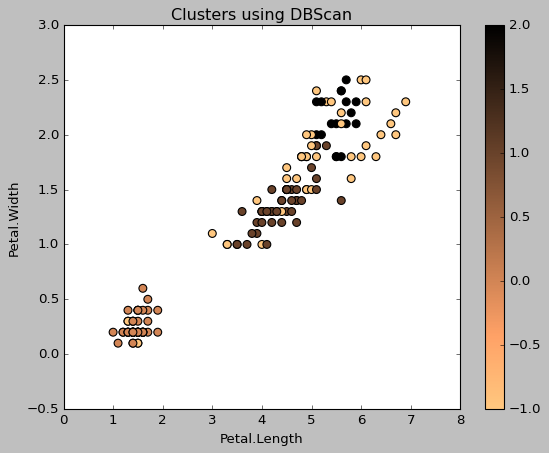

In [30]:
# We plot the newly derived clusters
# We can see that the clusters are overlapping when we considered eps = 0.475 and min pts is 5
# the overlapping indicates that the silhouette score value is close to 0, i.e., its not a great model
df1.plot(x="Petal.Length",y ="Petal.Width",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [27]:
dl = dbscan.labels_

In [29]:
# Calculating the silhouette score
# As identified in the above visualization, the clustering model developed is not a great score.
sklearn.metrics.silhouette_score(X, dl)

0.23537733019879264

In [31]:
# We try different minipt values and eps values to check if the silhouette to see which is the best fitted
# If the silhouette score dosen't improve even after trying various values, we change the model type.
# We try with k-means clustering model

In [33]:
# Here we are building a new model using k-means clustering
clf = KMeans(n_clusters=3) # no. of clusters considered is 3
y_kmeans = clf.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [35]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster'])
cl1

,Kcluster
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


In [36]:
# Adding the newly predicted kmeans model values to the dataset
df2 = pd.concat([df1,cl1],axis=1)
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster,Kcluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,0
146,6.3,2.5,5.0,1.9,virginica,-1,2
147,6.5,3.0,5.2,2.0,virginica,2,0
148,6.2,3.4,5.4,2.3,virginica,-1,0


Text(0.5, 1.0, 'Clusters using KMeans')

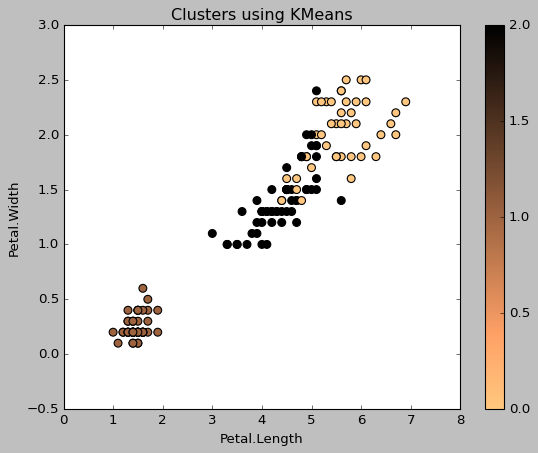

In [37]:
# Visualizing the k-means clustering model
df2.plot(x="Petal.Length",y ="Petal.Width",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using KMeans')

In [38]:
# Finding out the silhouette score for the k-means clustering model
sklearn.metrics.silhouette_score(X, y_kmeans)

0.45994823920518646

In [39]:
# The kmeans model silhouette score is better than DB scan model silhouette score.
# This is because the dataset is smaller and has limited/ no outliers within it. Therefore K-means clustering works better when there is no outliers
# This is how we can check which model works better by comparing the silhouette score

In [40]:
# When solving clustering problems,
# First start with heirarchical clustering model. If the dendrogram becomes too complex then,
# Use the k-means clustering and find out the silhouette score.
# Then use DB scan clustering and find out the silhouette score.
# Compare both the score and which ever is better use that model

In [13]:
# EPS calculations
# We use the nearest neighbour method to calculate the eps value.
# No. of neighbours considered = 2n, n is the no. of columns. Therefore, no. of neighbours considered is 8
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X) # we fit the neighbours on to x to find out the dense points
distances, indices = nbrs.kneighbors(X) # we then find out the distances of x with the neighbours (nearest/k)

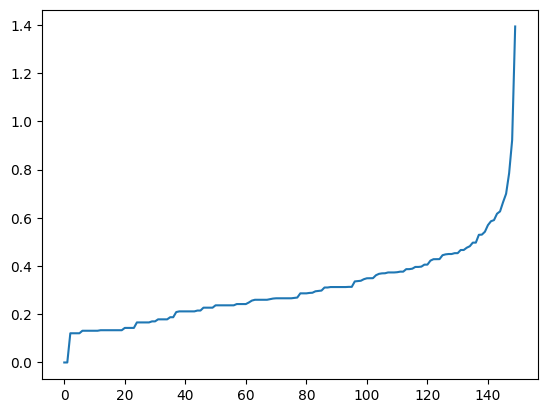

In [14]:
# We are sorting all distances in ascending order and then plotting them
# In the plot, wherever there is a bend in the curve, we can take those values as the eps.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [15]:
# Therefore we can assume eps as - 0.47, 0,475, 0.48, 0485, 0.49, 0.495, 0.5 and so on.
# So we are starting with eps = 0.475